In [1]:
from variance_utils import *

In [2]:
session = 757216464

## Static gratings

In [3]:
stimulus_type = 'static'
frequency = 'spatial_frequency'

In [4]:
raw_dataset = pd.read_parquet(f'../ourdata/{stimulus_type}_dataset_session_{session}.parquet')
raw_dataset

,stimulus_presentation_id,unit_id,stimulus_name,spatial_frequency,orientation,spikes_per_second,area
index,,,,,,,
0,49434,951797083,static_gratings,0.32,0.0,43.964810,MGm
1,49434,951797141,static_gratings,0.32,0.0,43.964810,MGm
2,49434,951797185,static_gratings,0.32,0.0,19.984004,MGm
3,49434,951797253,static_gratings,0.32,0.0,23.980805,MGm
4,49434,951797285,static_gratings,0.32,0.0,7.993602,MGm
...,...,...,...,...,...,...,...
3250866,70389,951820289,static_gratings,0.04,150.0,7.993529,CA1
3250867,70389,951820298,static_gratings,0.04,150.0,27.977350,CA1
3250868,70389,951820332,static_gratings,0.04,150.0,3.996764,VISal


In [5]:
analysed_dataset = pd.read_parquet(f'../ourdata/df_{stimulus_type}_session_{session}.parquet')
analysed_dataset

,stimulus_presentation_id,area,spatial_frequency,orientation,active
0,49434,APN,0.32,0.0,1
1,49434,CA1,0.32,0.0,1
2,49434,CA3,0.32,0.0,1
3,49434,DG,0.32,0.0,1
4,49434,Eth,0.32,0.0,1
...,...,...,...,...,...
122948,70389,VISal,0.04,150.0,1
122949,70389,VISam,0.04,150.0,0
122950,70389,VISl,0.04,150.0,0
122951,70389,VISp,0.04,150.0,1


### Unit-level analysis

In [6]:
# we compute the variance of the spikes per second for each unit
variances_units = compute_dataset_variance(raw_dataset, frequency)

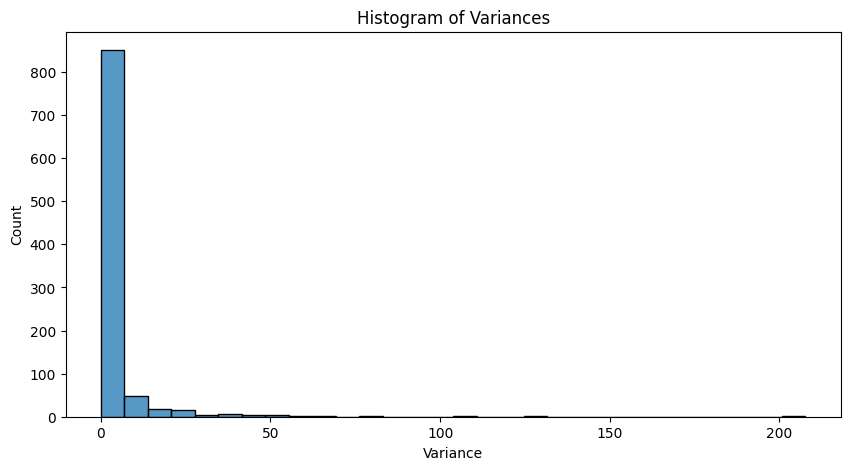

In [7]:
# we plot the histogram of the variances to see how they are distributed
histogram_variances(variances_units)

we see that most of the units have low variance. we are only interested in the units which have a higher variance so we keep only those:

In [8]:
# top 5% units with most variance
top_5_percent_variances = top_variances(variances_units, 0.05)

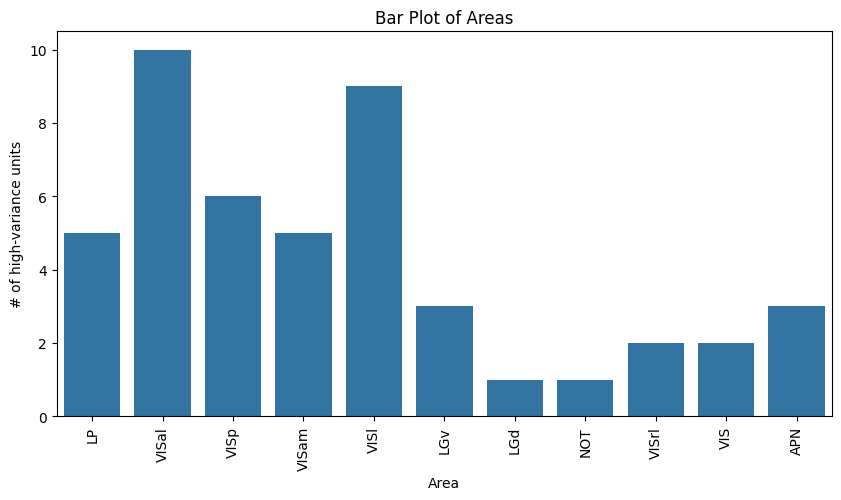

In [9]:
# we not create a dictionary with the areas of the top 5% units and their frequency
areas = get_area_frequency(raw_dataset, top_5_percent_variances.keys())
bar_plot_areas(areas)

In [10]:
# get the top areas
sorted_areas = sorted(areas.items(), key=lambda x: x[1], reverse=True)
top_areas = [area[0] for area in sorted_areas[:5]]
# we print the top areas
print('Areas with the highest number of high-variance neurons:', top_areas)

Areas with the highest number of high-variance neurons: ['VISal', 'VISl', 'VISp', 'LP', 'VISam']


Area: VISal


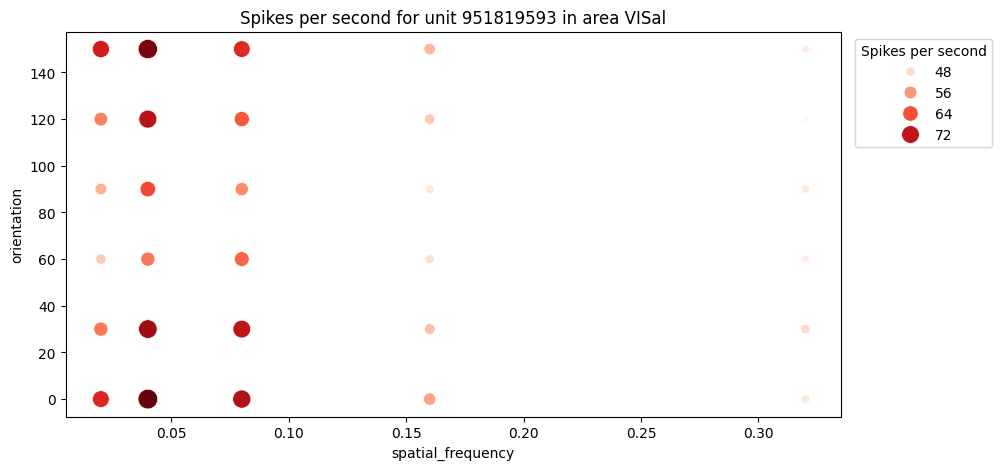

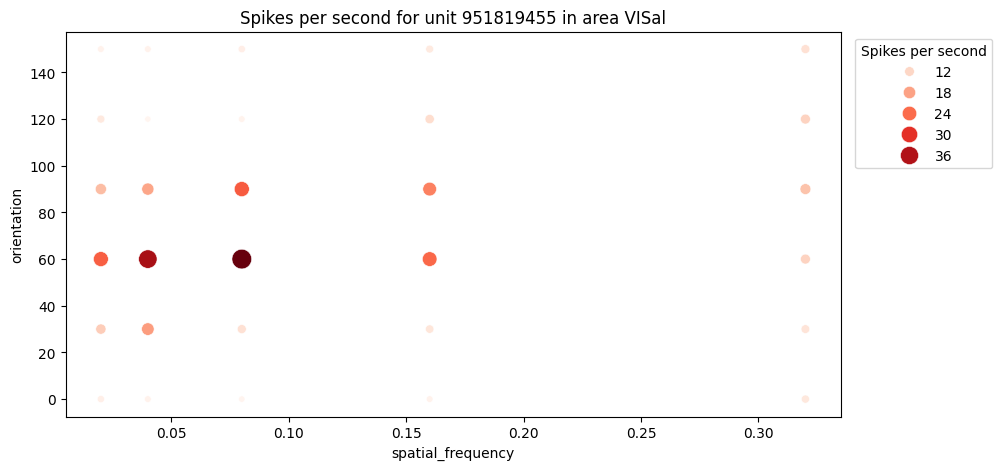

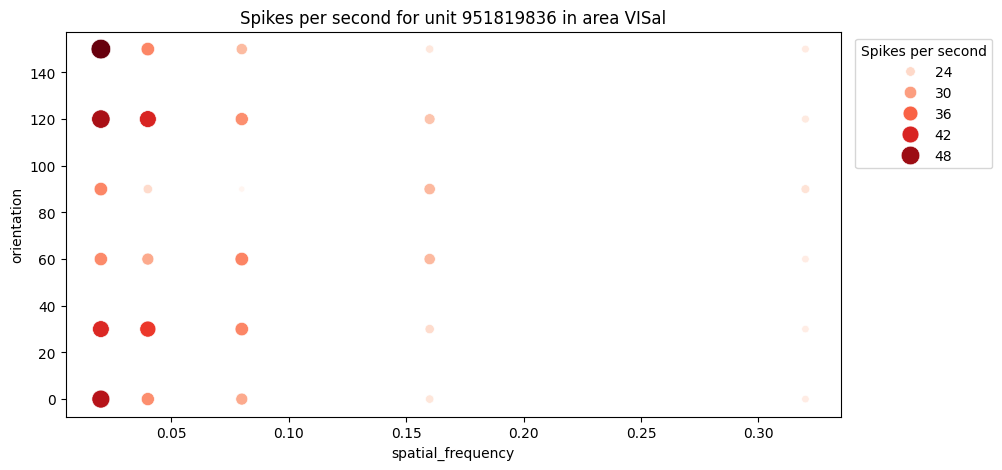

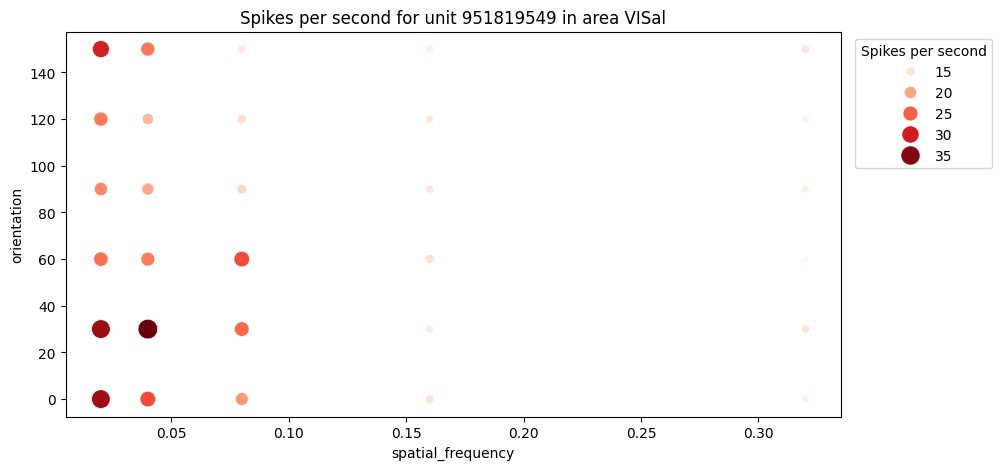

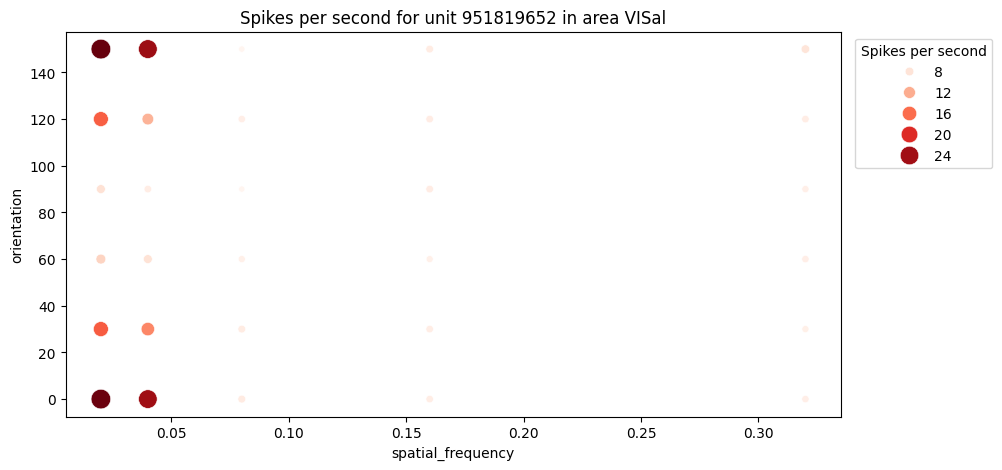

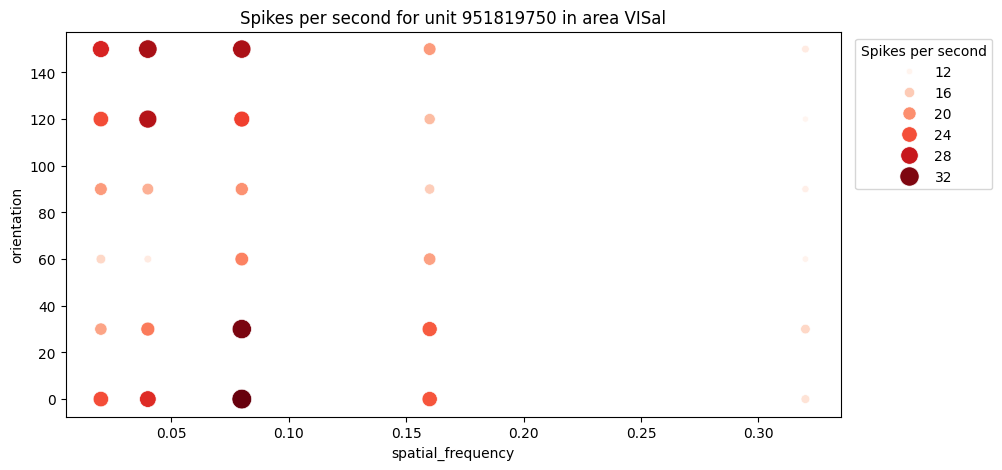

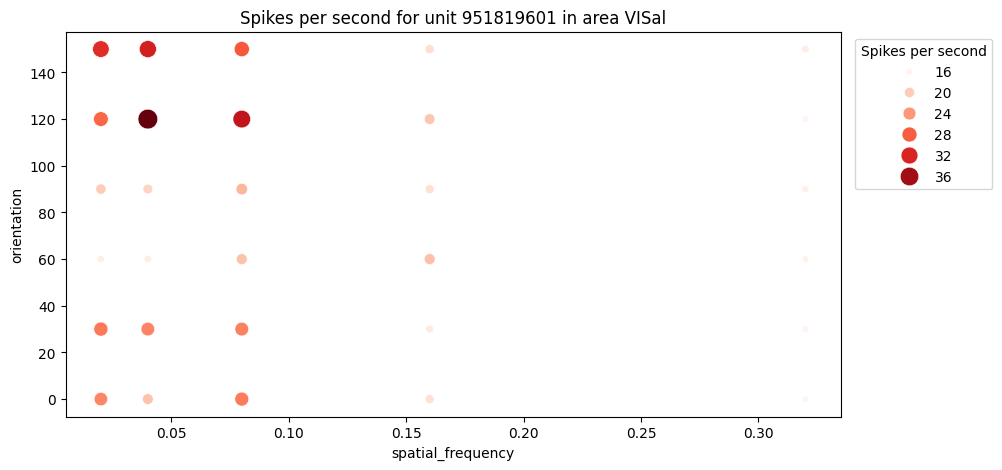

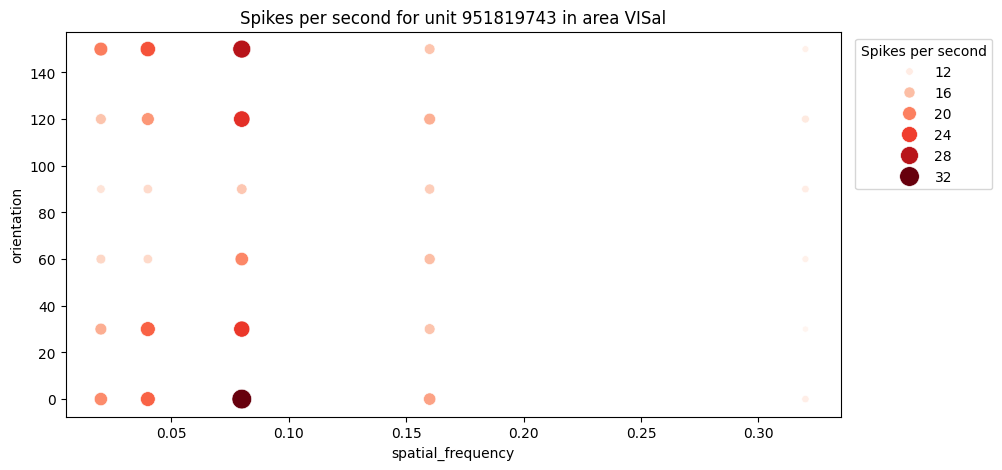

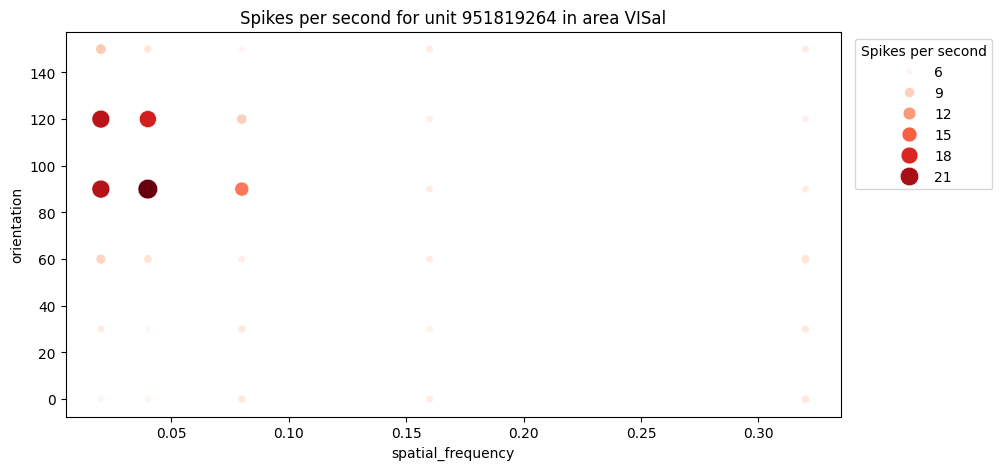

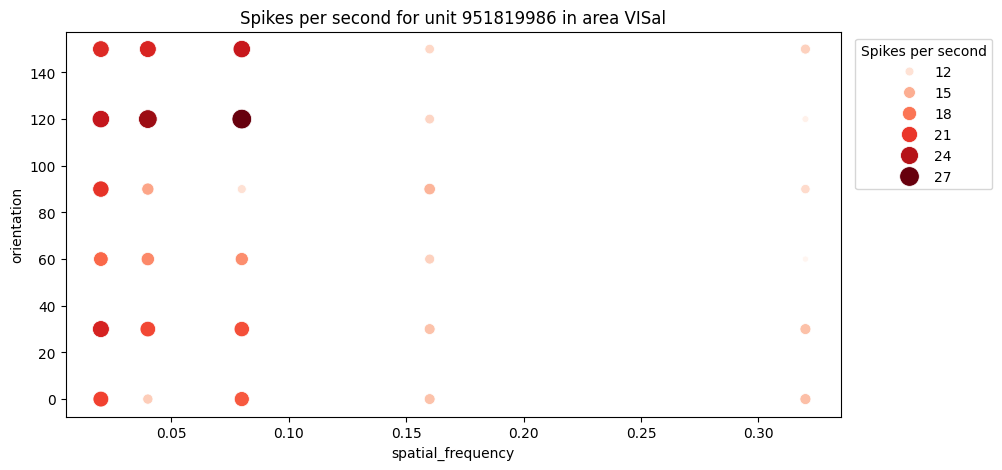

Area: VISl


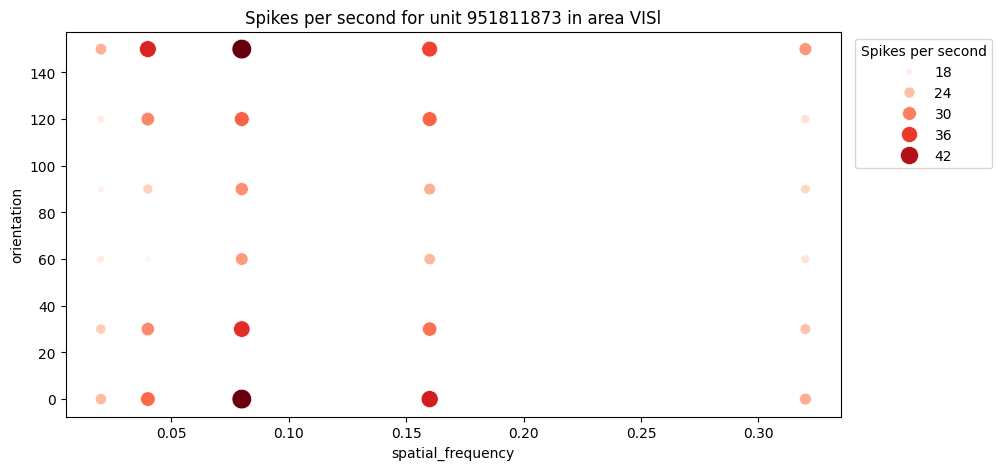

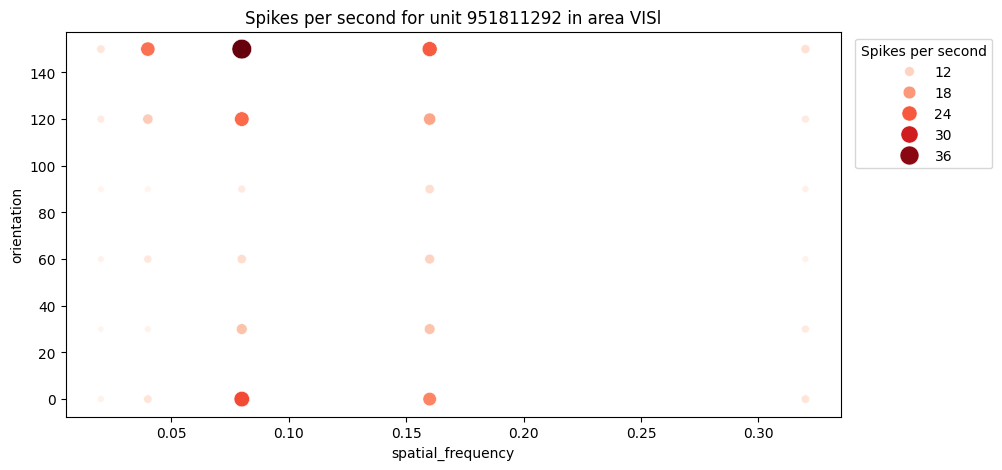

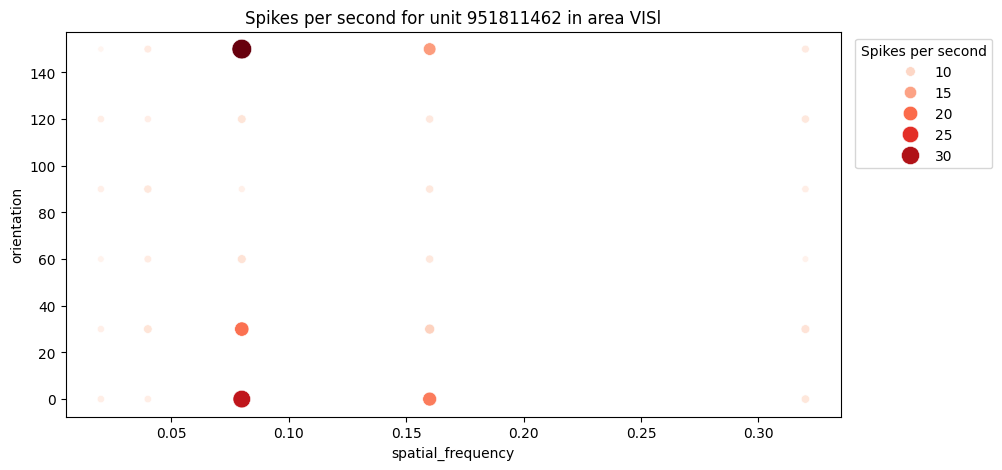

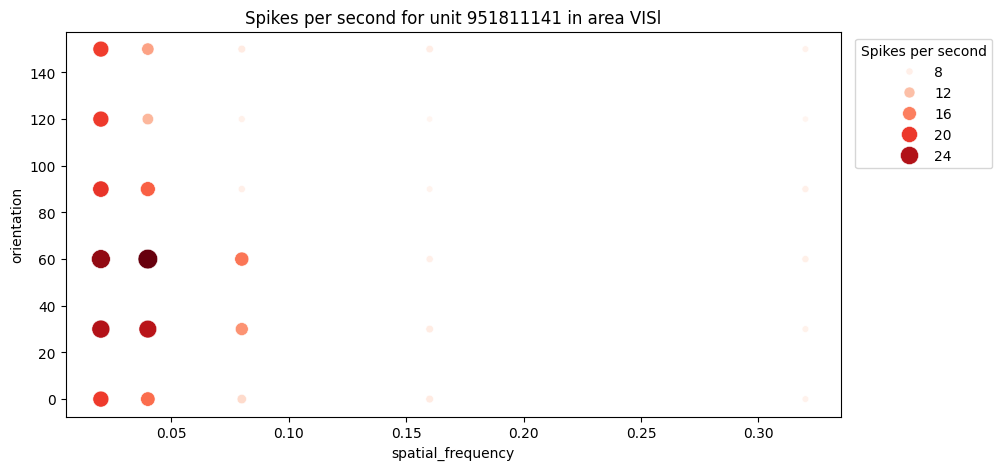

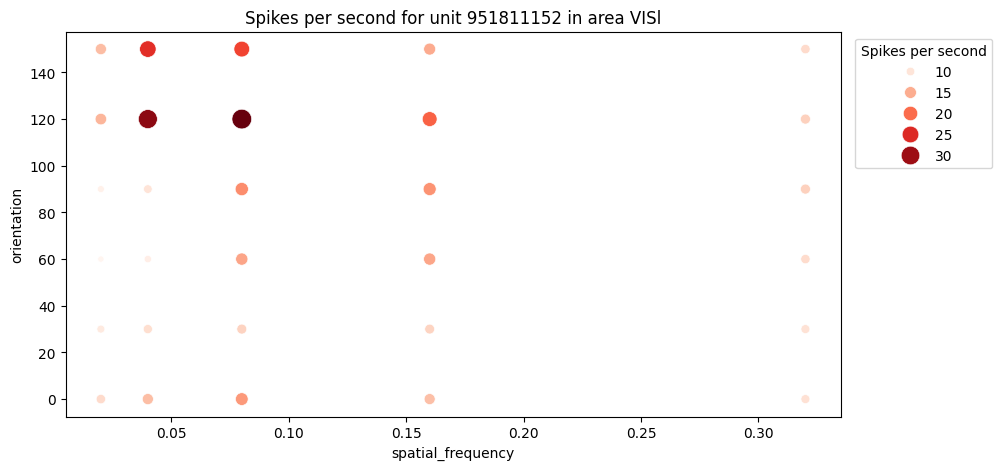

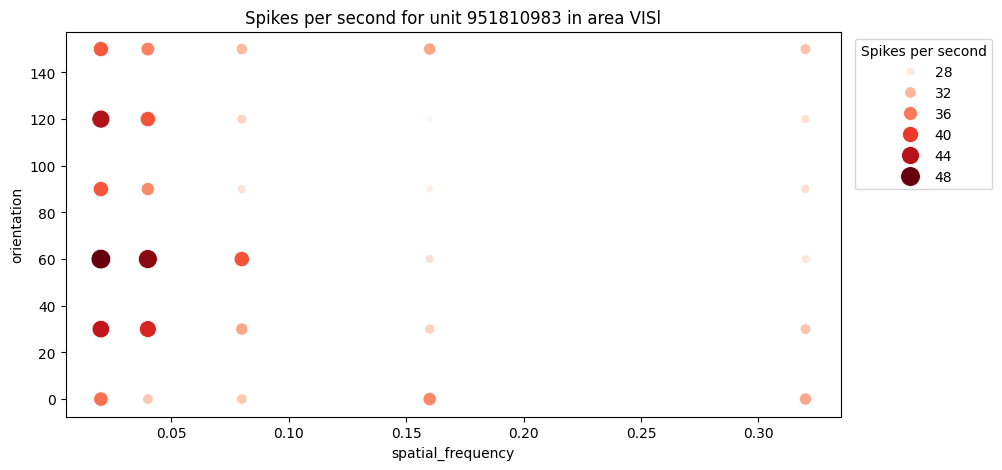

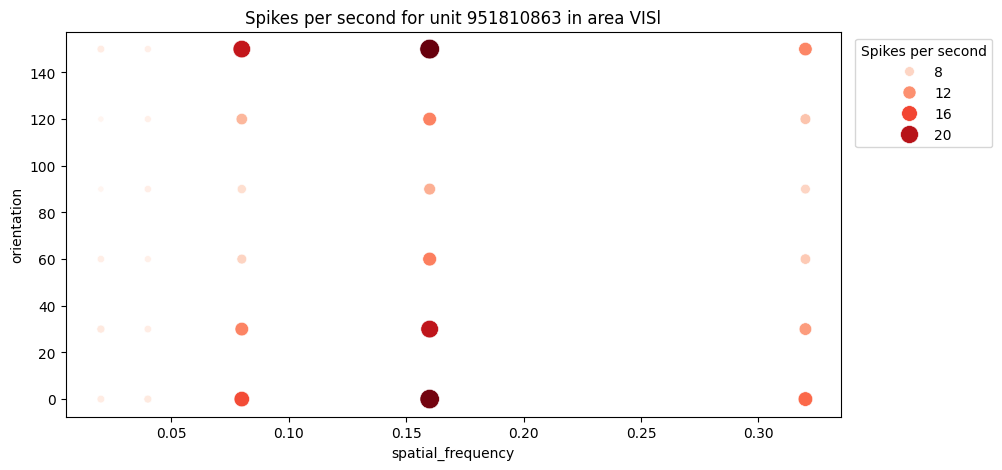

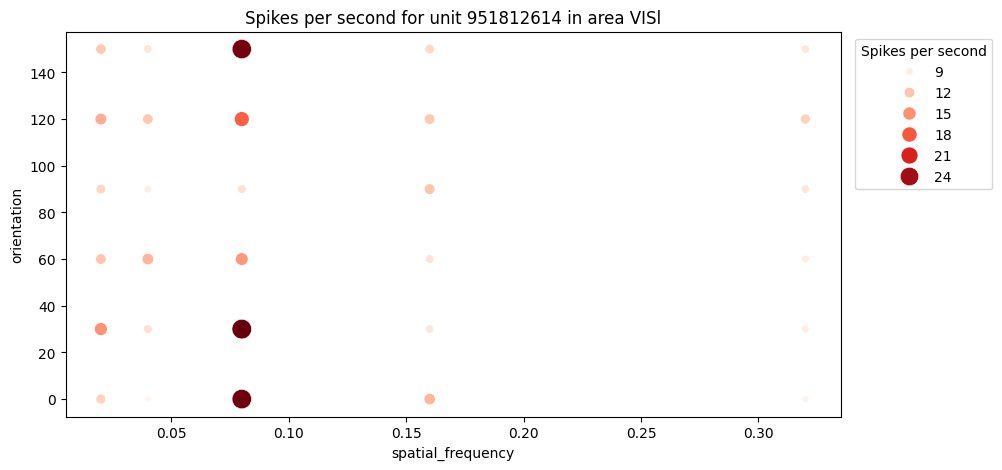

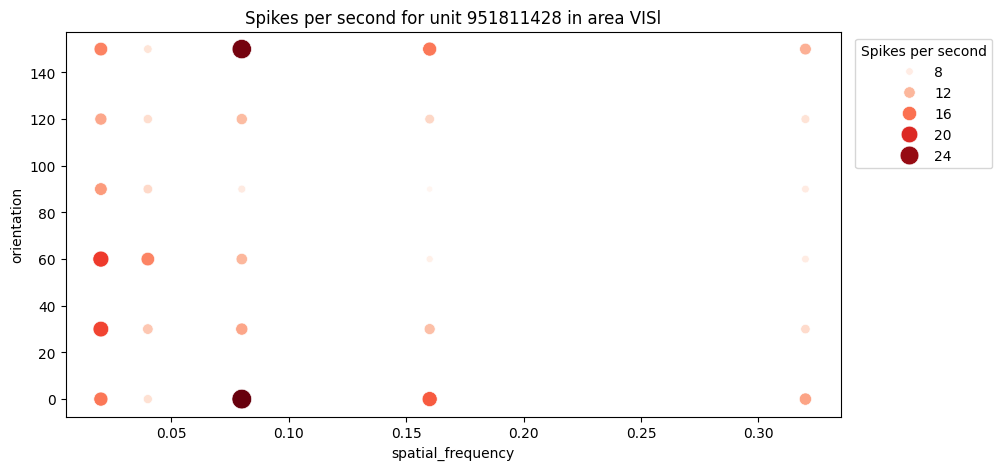

Area: VISp


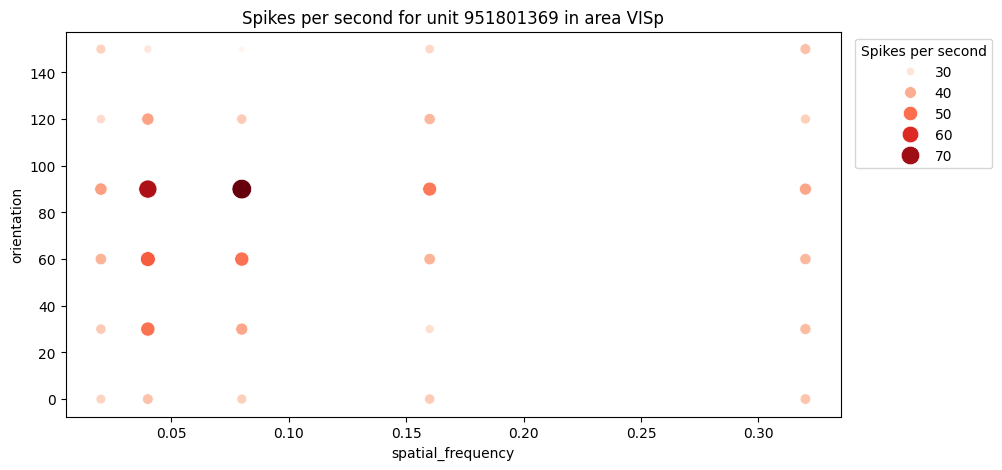

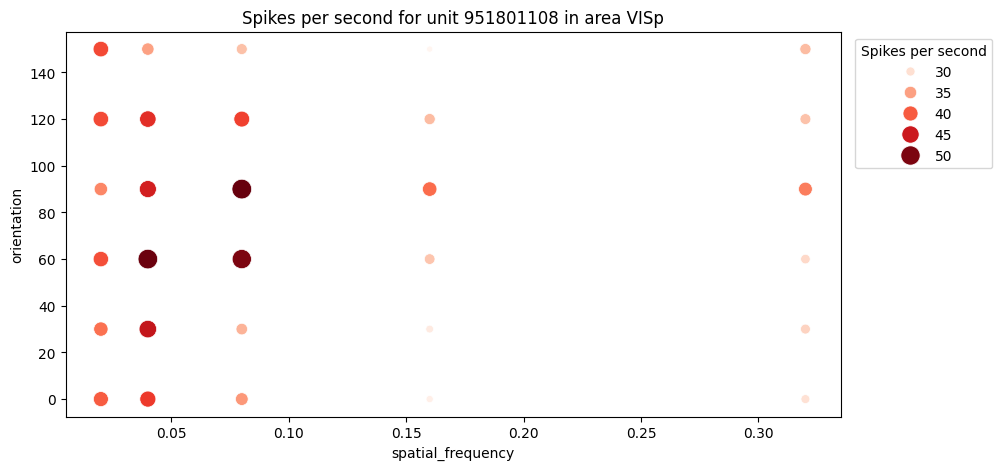

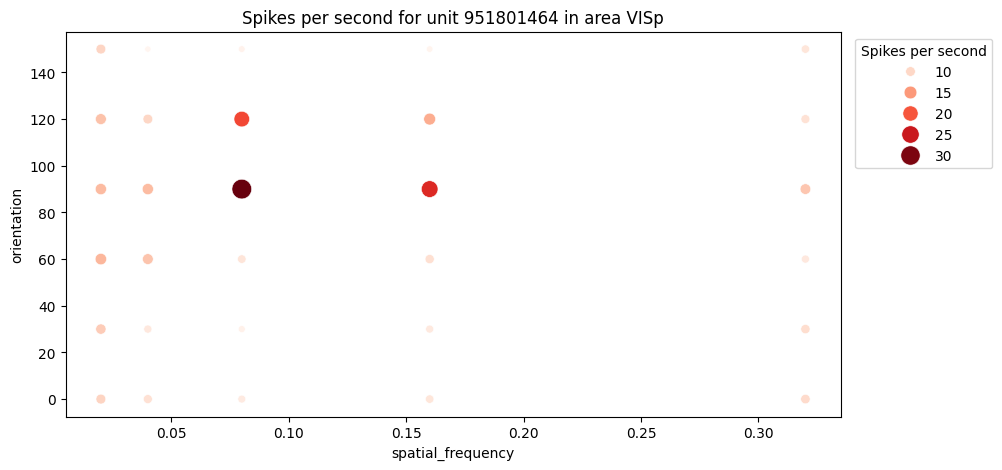

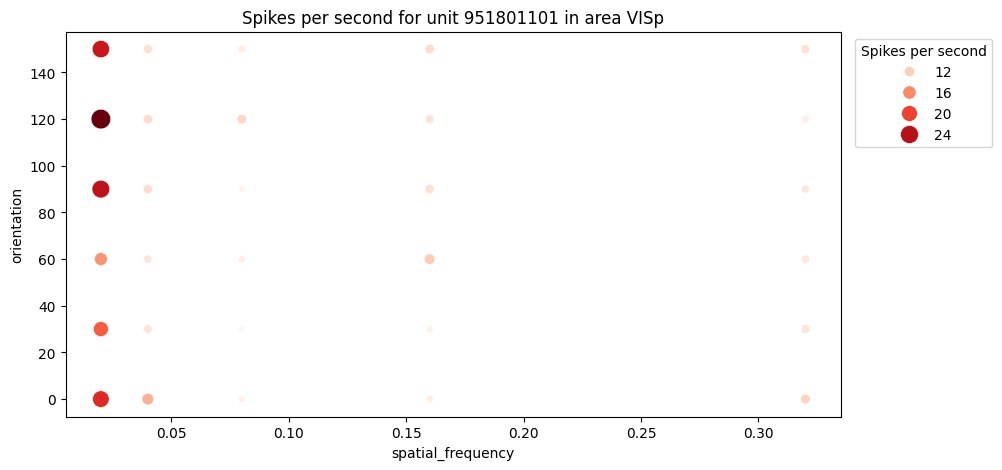

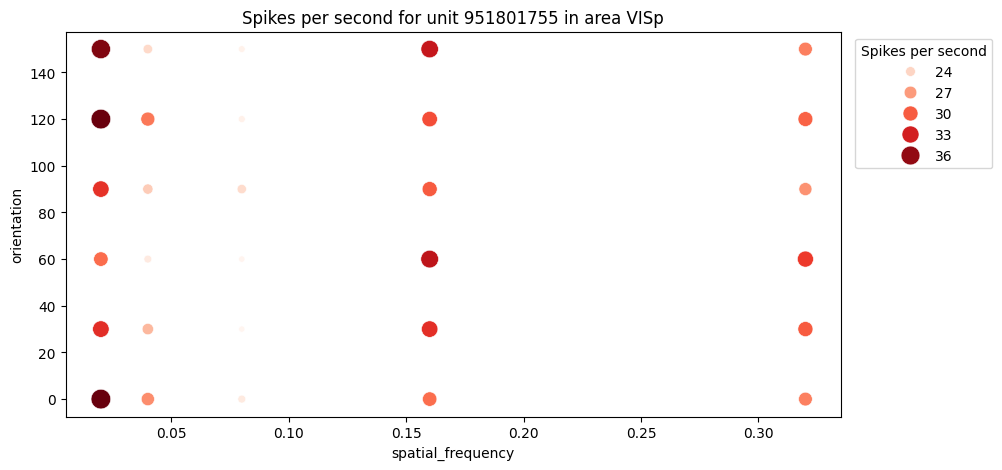

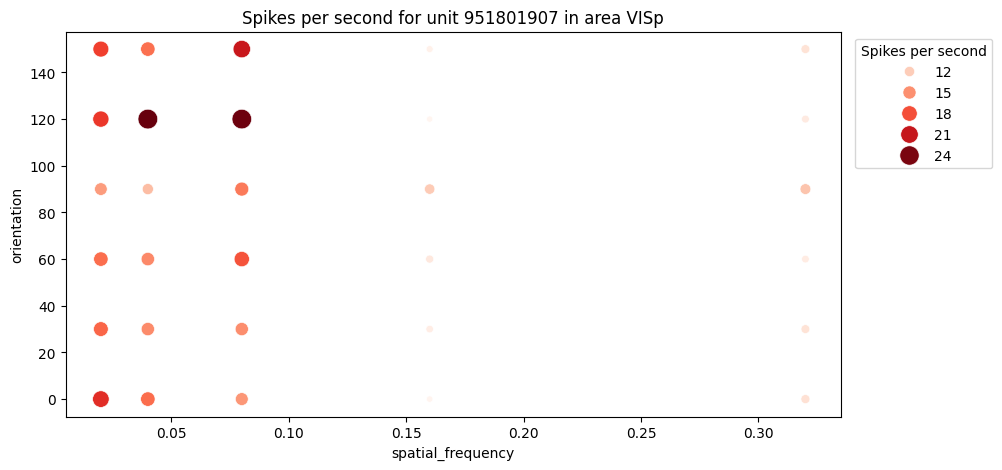

Area: LP


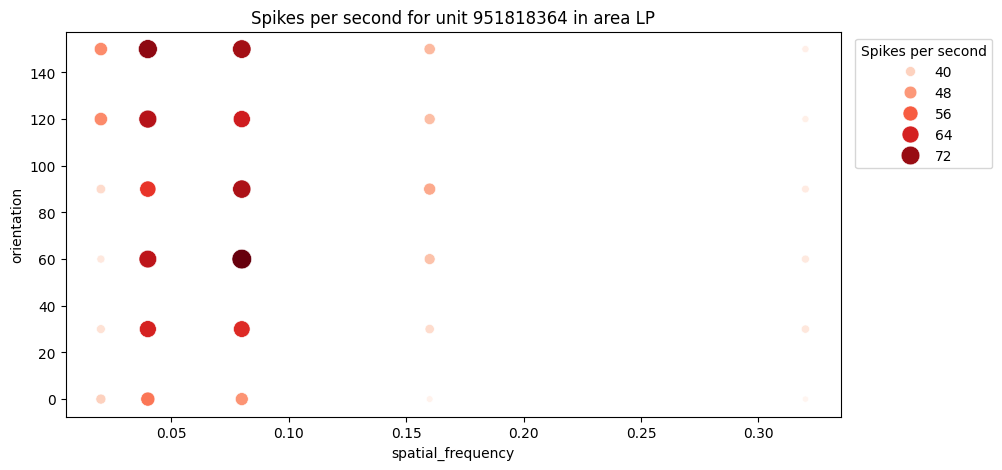

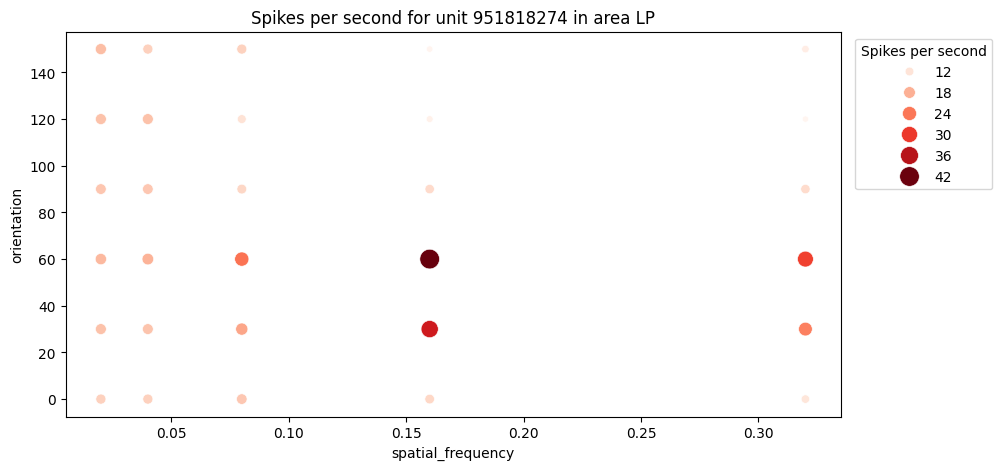

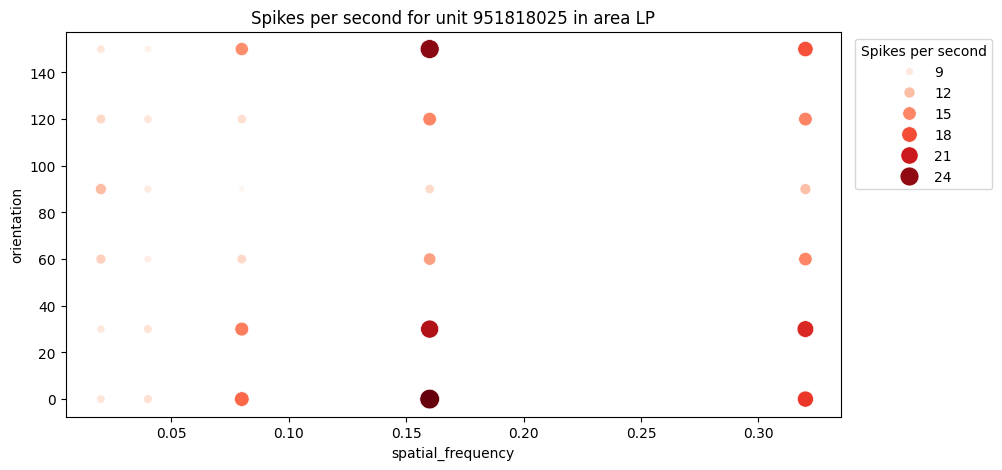

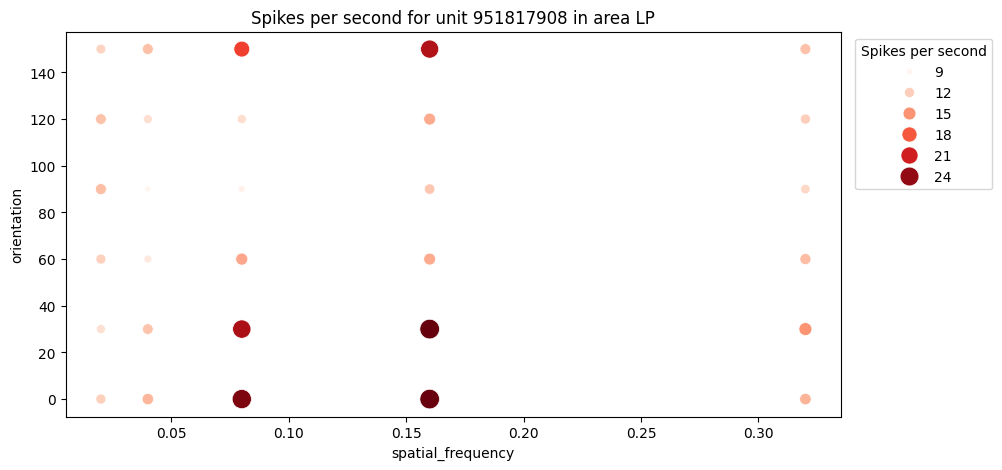

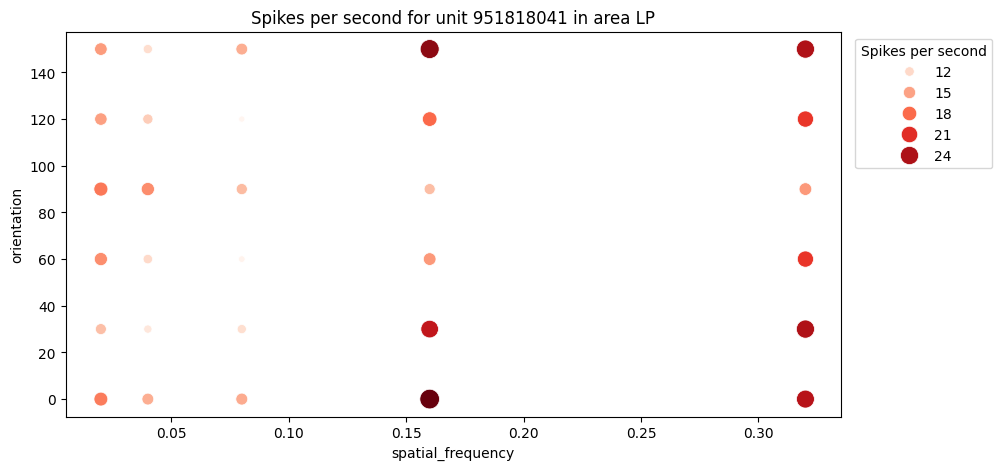

Area: VISam


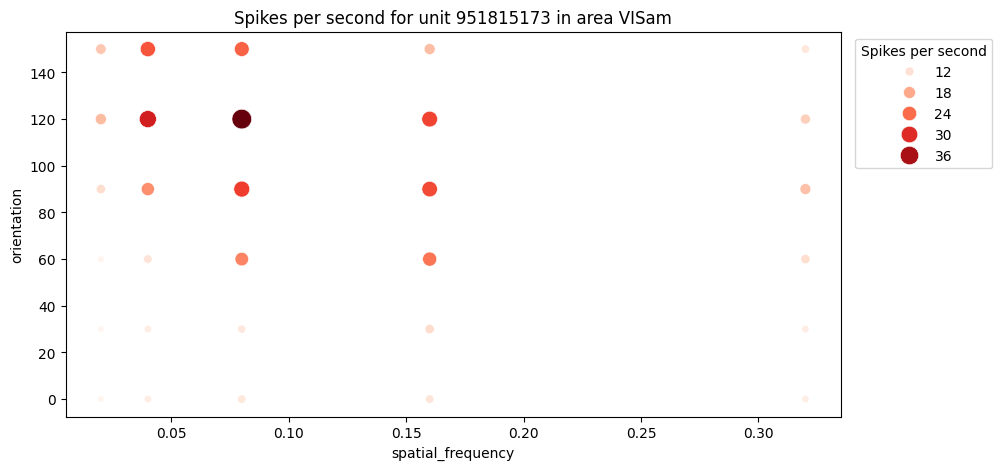

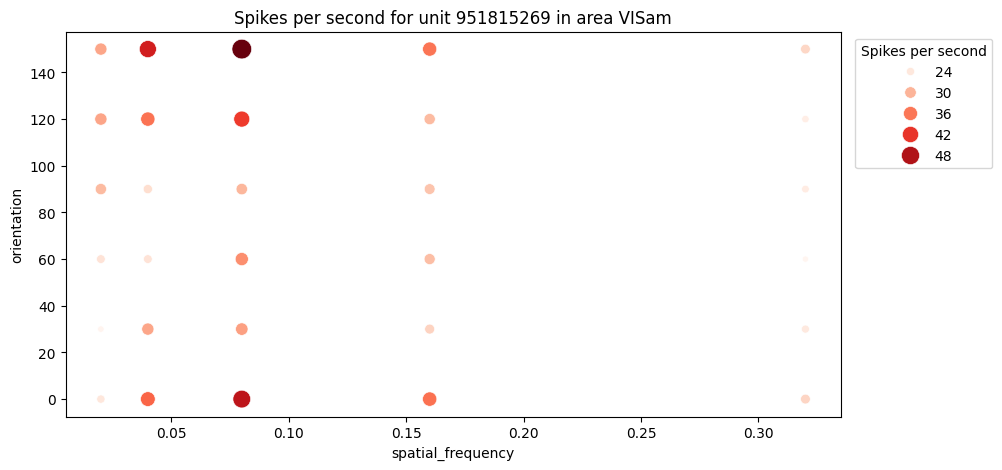

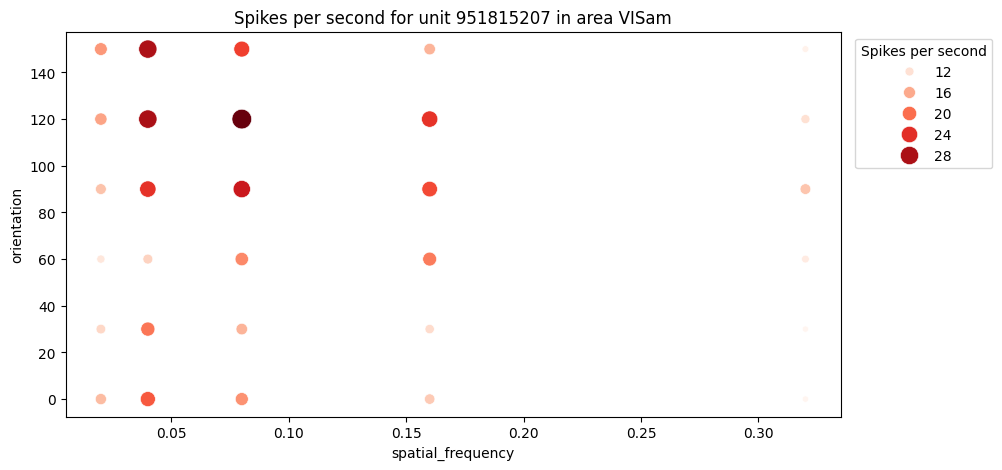

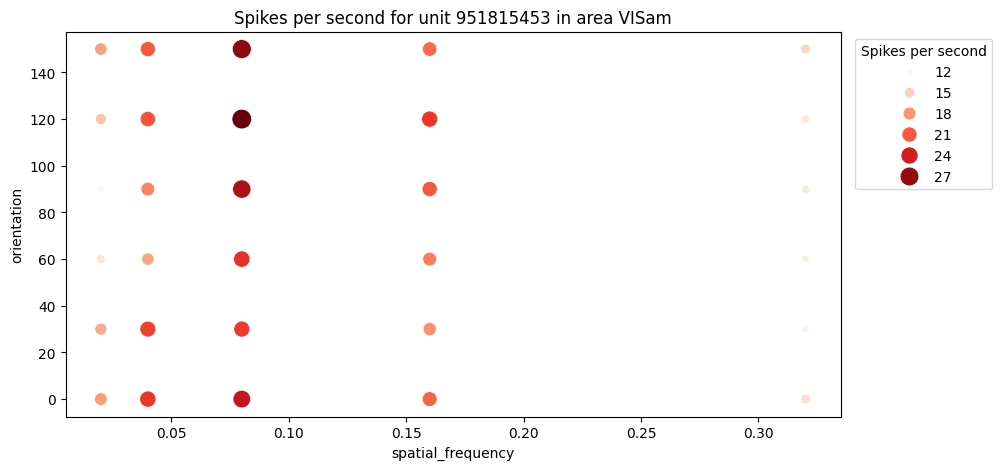

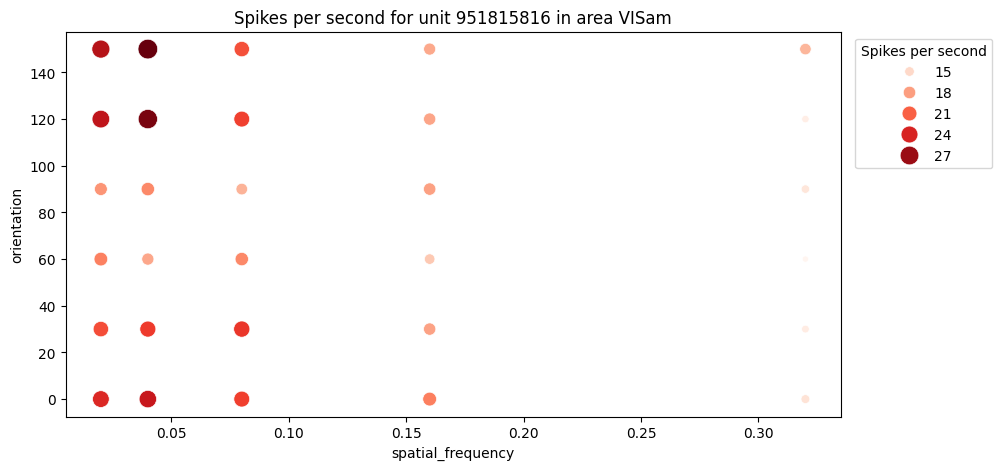

In [11]:
# Group units by their areas
units_by_area = {}
for unit in top_5_percent_variances.keys():
    area = get_unit_area(raw_dataset, unit)
    if area in top_areas:
        if area not in units_by_area:
            units_by_area[area] = []
        units_by_area[area].append(unit)

# Plot units in order of their areas
for area in top_areas:
    if area in units_by_area:
        print(f'Area: {area}')
        for unit in units_by_area[area]:
            plot_unit_spikes_per_second(raw_dataset, unit, frequency)

### Area-level analysis

In [12]:
variances_areas = compute_dataset_variance_area(raw_dataset, frequency)

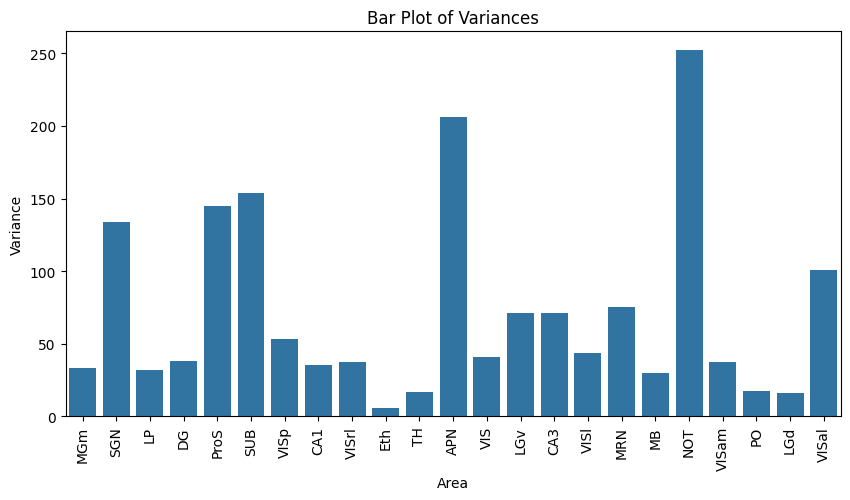

In [13]:
bar_plot_variances(variances_areas)

In [14]:
sorted_areas = sorted(variances_areas.items(), key=lambda x: x[1], reverse=True)
top_areas_variances = [area[0] for area in sorted_areas[:5]]
print('Areas with the highest variance:', top_areas_variances)

Areas with the highest variance: ['NOT', 'APN', 'SUB', 'ProS', 'SGN']


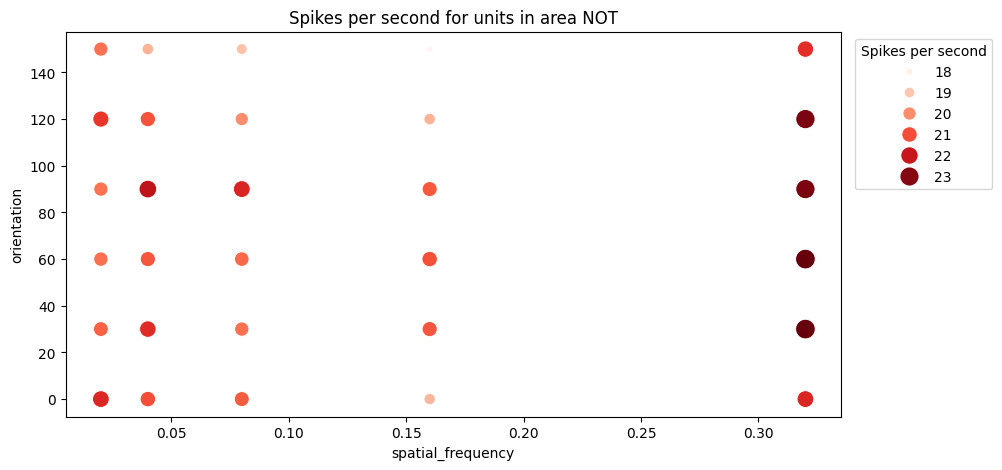

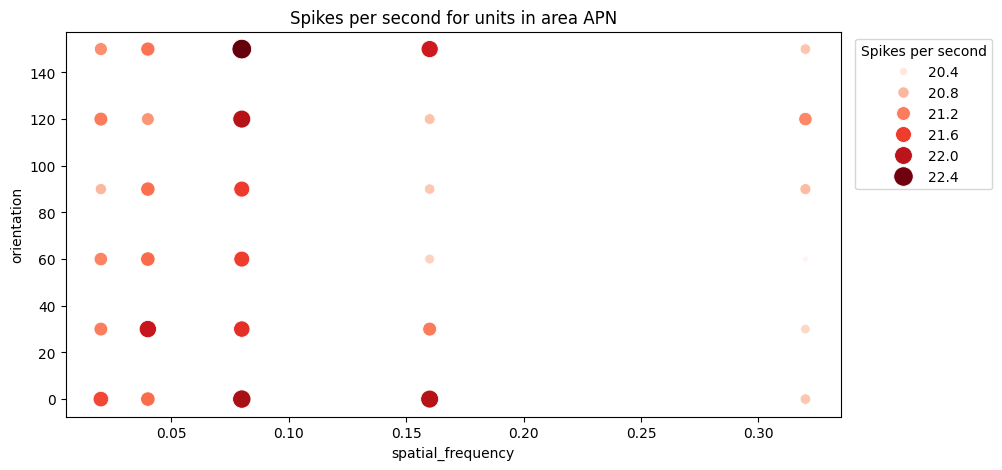

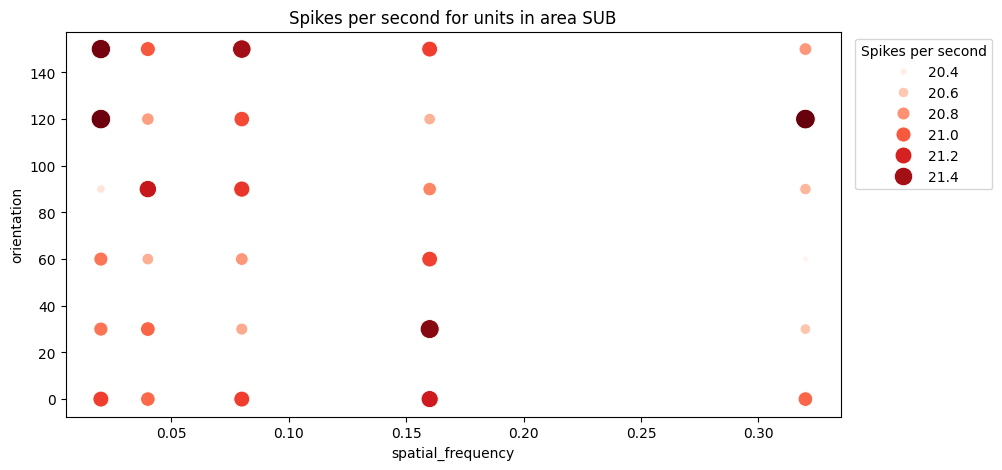

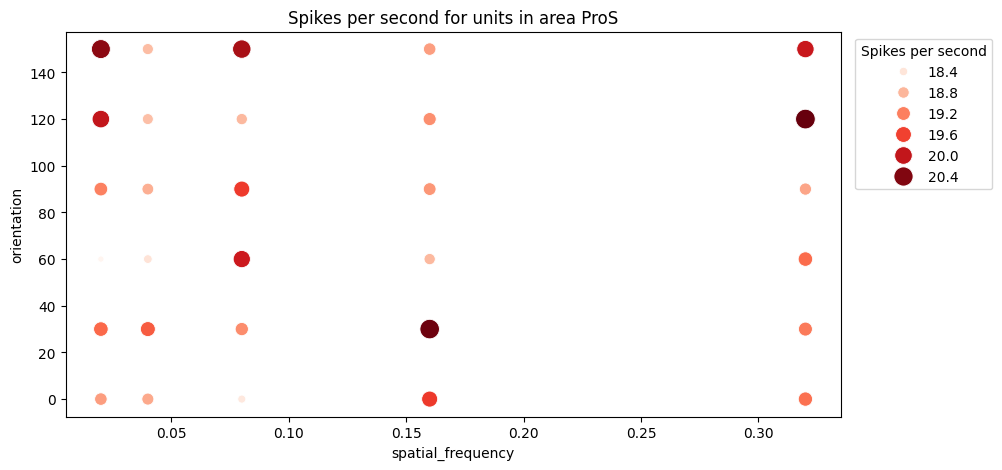

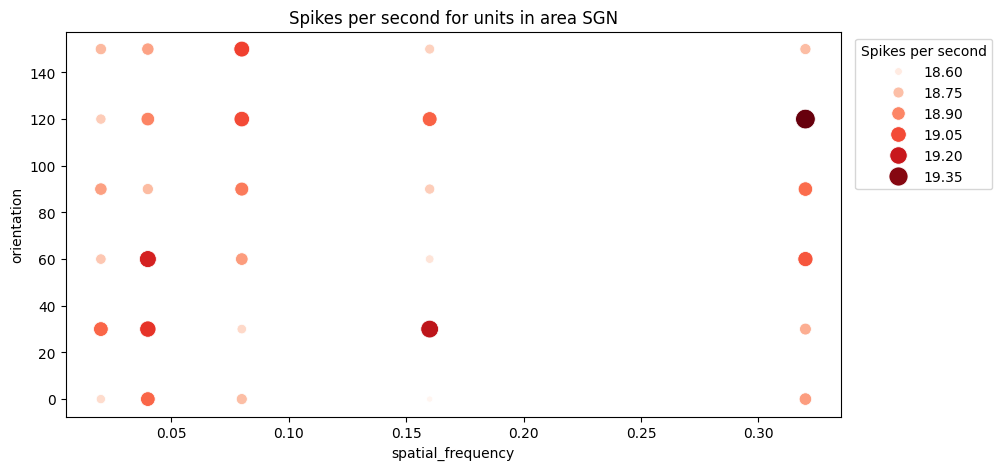

In [15]:
for area in top_areas_variances:
    plot_area_spikes_per_second(raw_dataset, area, frequency)